# Parkinson's disease Detector - XGBoost

![image](https://biologyjunction.com/wp-content/uploads/2017/08/parkinsons-disease-1.jpg)

# What is Parkinson's?
Parkinson's disease (PD) is a neurodegenerative disorder that affects predominately dopamine-producing (“dopaminergic”) neurons in a specific area of the brain called substantia nigra.

Symptoms generally develop slowly over years. The progression of symptoms is often a bit different from one person to another due to the diversity of the disease. People with PD may experience:

  -  Tremor, mainly at rest and described as pill rolling tremor in hands. Other forms of tremor are possible
  -  Bradykinesia
  - Limb rigidity
  - Gait and balance problems

The cause remains largely unknown. Although there is no cure, treatment options vary and include medications and surgery. While Parkinson’s itself is not fatal, disease complications can be serious. The Centers for Disease Control and Prevention (CDC) rated complications from PD as the 14th cause of death in the United States.


## Attributes

**name** - ASCII subject name and recording number

**mdvp_fo_hz** - Average vocal fundamental frequency (Actualy column name MDVP:Fo(Hz) )

**mdvp_fhi_hz** - Maximum vocal fundamental frequency (Actualy column name MDVP:Fhi(Hz) )

**mdvp_flo_hz** - Minimum vocal fundamental frequency (Actualy column name MDVP:Flo(Hz) )

**mdvp_jitter_in_percent, mdvp_jitter_abs, mdvp_rap, mdvp_ppq, jitter_ddp** - Several measures of variation in fundamental frequency (Actualy column names MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP respectively)

**mdvp_shimmer, mdvp_shimmer_db, shimmer_apq3, shimmer_apq5, mdvp_apq, shimmer_dda** - Several measures of variation in amplitude (Actualy column names MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA respectively)

**nhr, hnr** - Two measures of ratio of noise to tonal components in the voice (Actualy column names NHR, HNR respectively)

**rpde, d2** - Two nonlinear dynamical complexity measures (Actualy column names RPDE, D2 respectively)

**dfa** - Signal fractal scaling exponent (Actualy column name DFA )

**spread1, spread2, ppe** - Three nonlinear measures of fundamental frequency variation (Actualy column names spread1, spread2, PPE respectively)

**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy (Target Varibale / attribute)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Parkinson_disease.csv')
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [3]:
print(f"Dataset rows: {df.shape[0]}")
print(f"Dataset columns: {df.shape[1]}")

Dataset rows: 195
Dataset columns: 24


In [4]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [6]:
# data type
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

## Missing Values


In [7]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

## Duplicated data

In [8]:
df.duplicated().sum()

0

## EDA - Exploratory Data Analysis

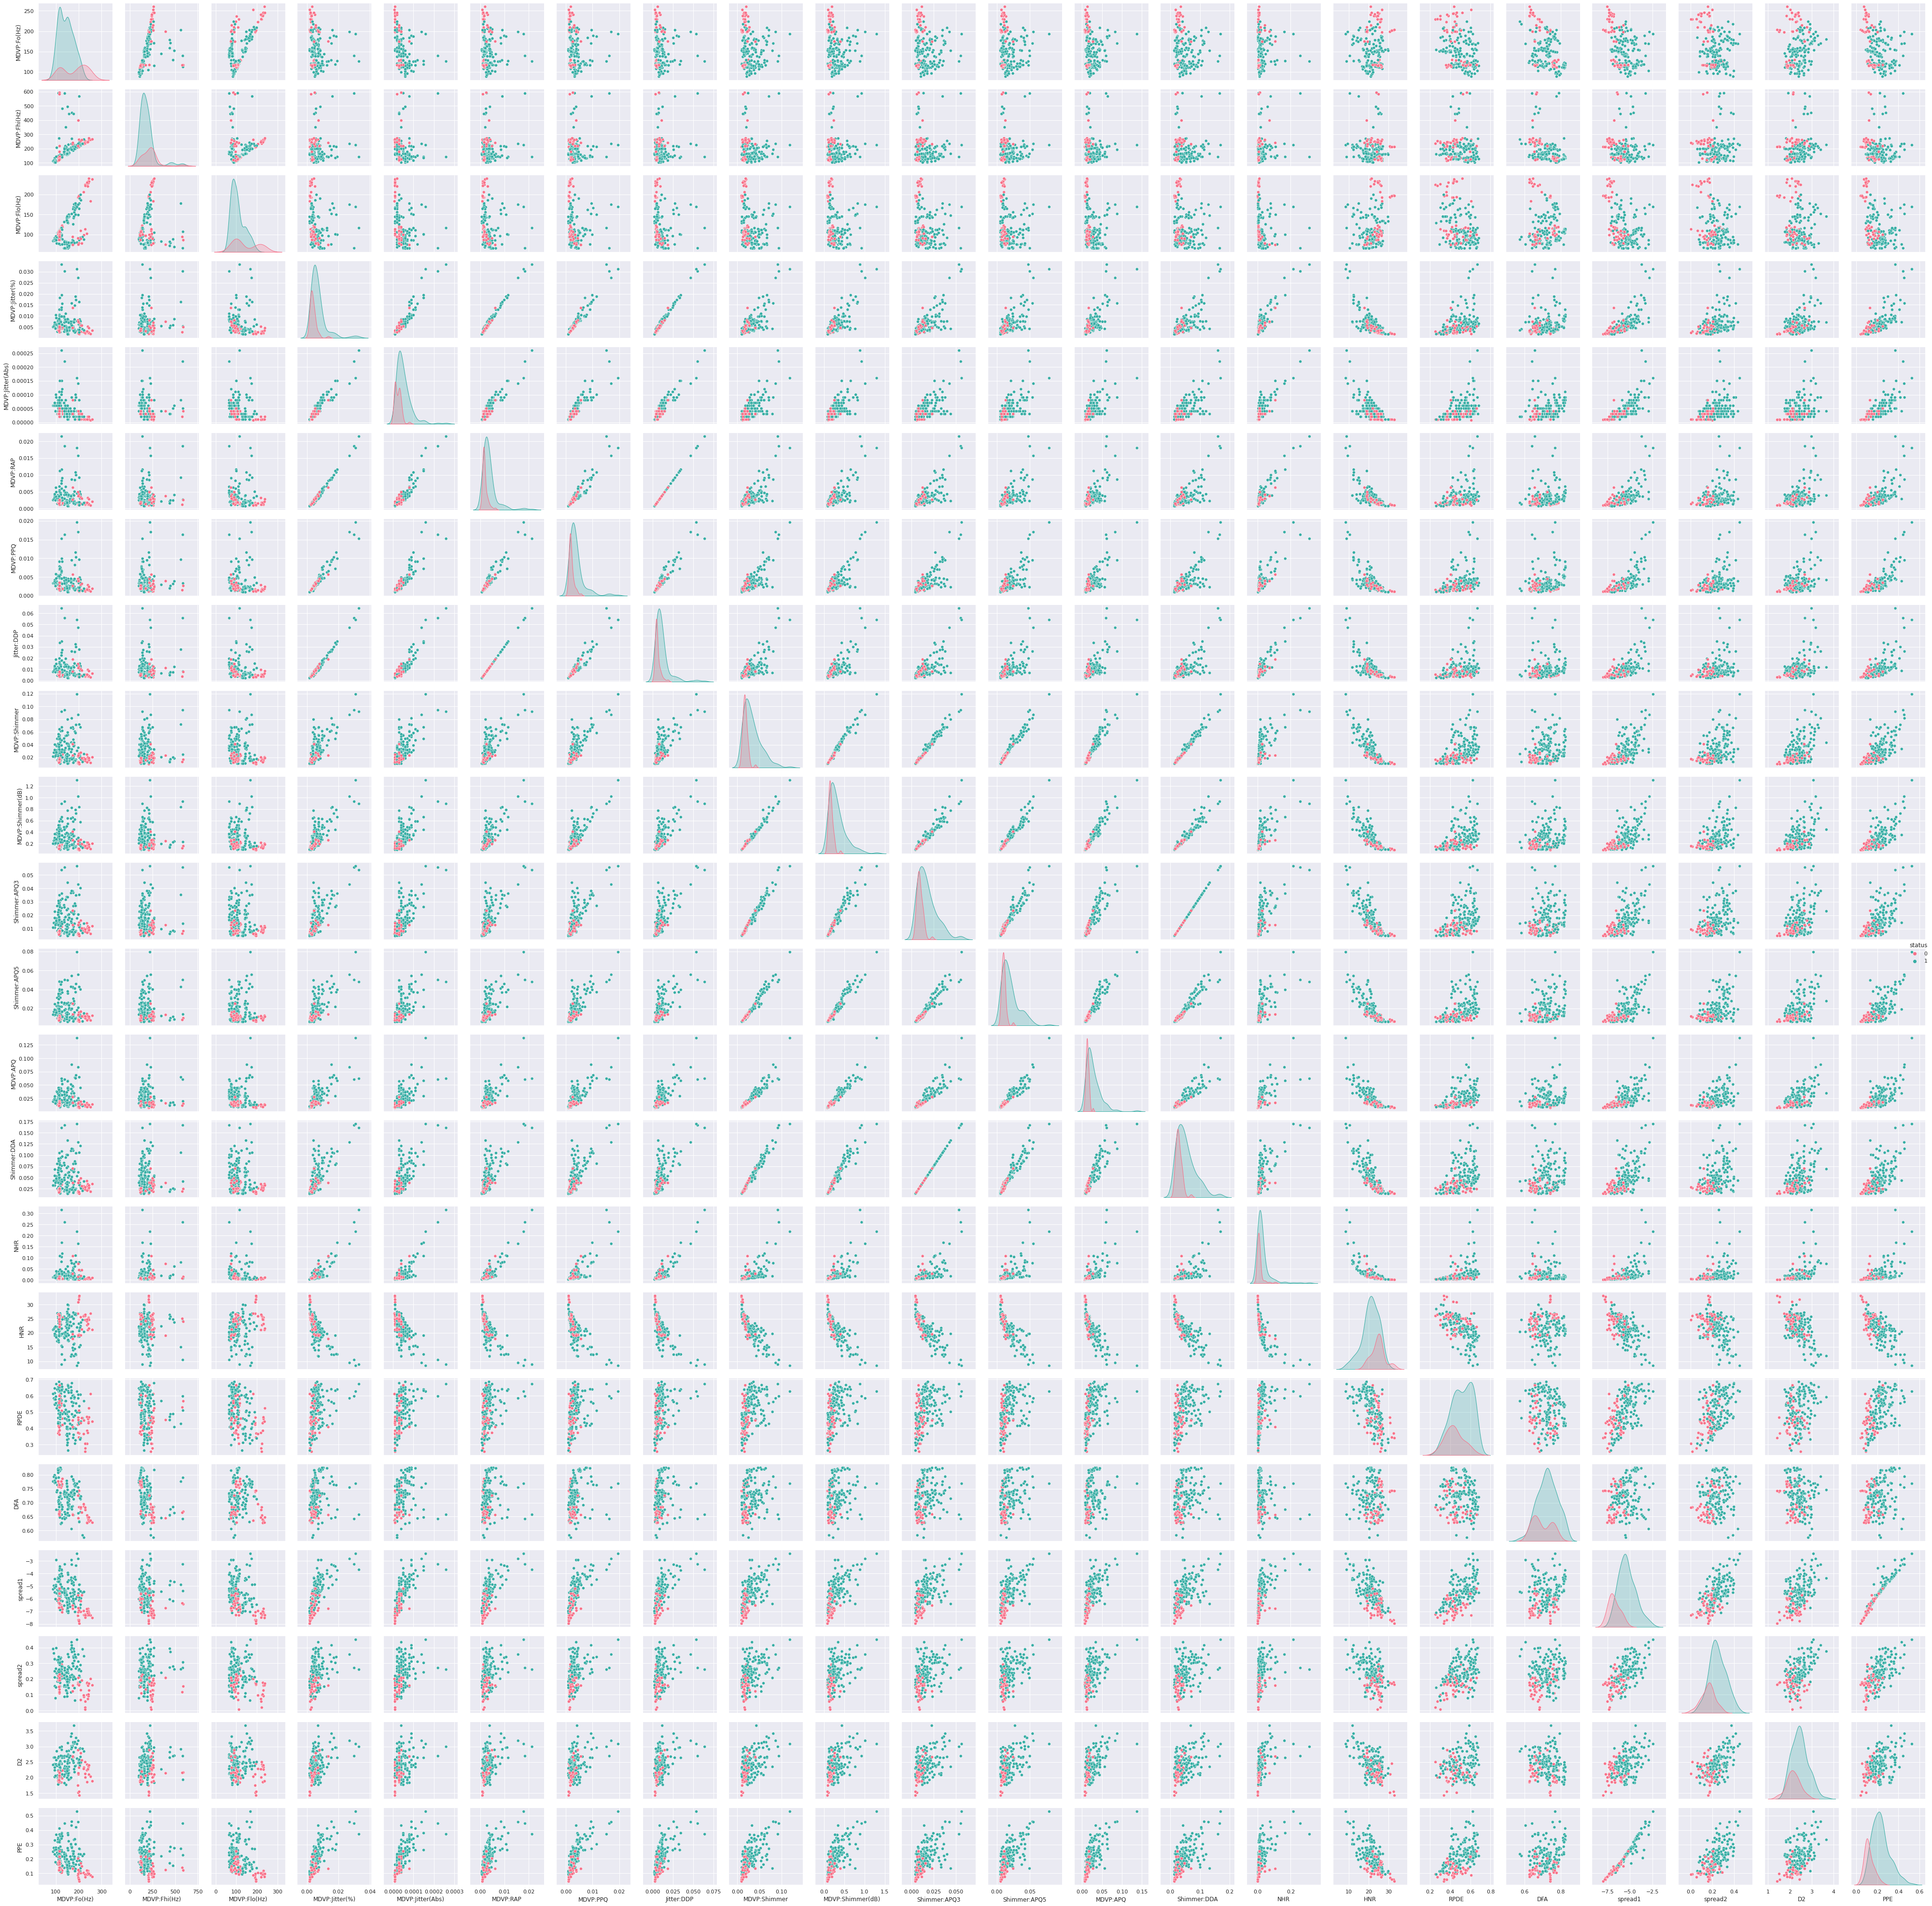

In [10]:
# Relationship between target variable(status) and features
sns.set_theme(style='darkgrid')

sns.pairplot(
    hue='status',
    data=df,
    palette ="husl",
    diag_kind='kde'
    )

plt.tight_layout()
plt.show()

No data for name


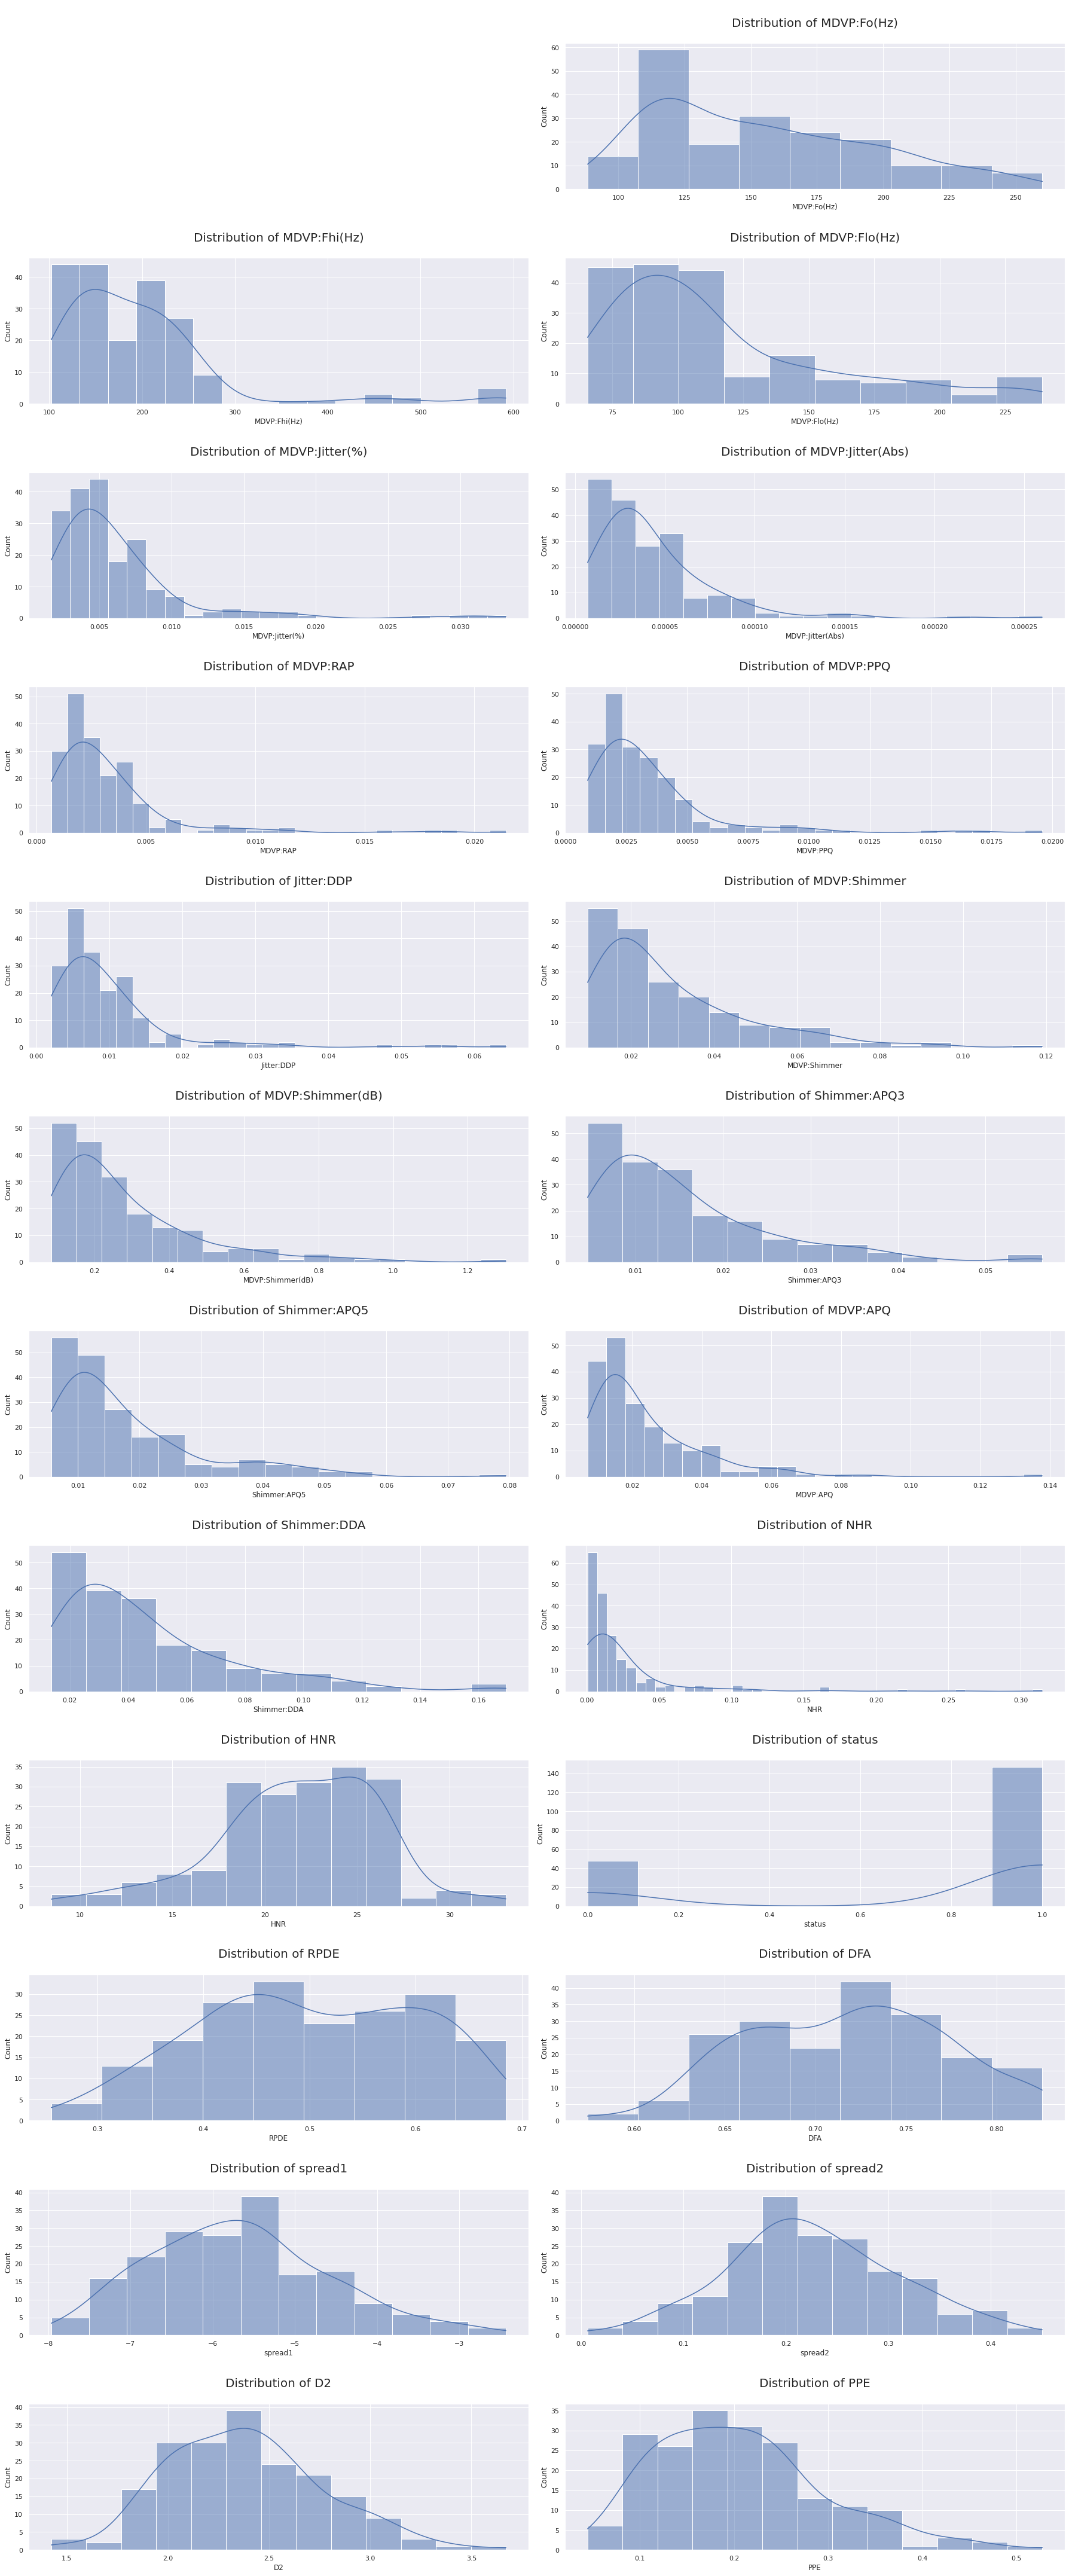

In [11]:
# https://www.malvicalewis.com/post/part-1-parkinson-s-disease-detection-using-ensemble-techniques-in-machine-learning
# Correlation between two numerical features
color_palette = sns.color_palette('rocket')
fig, ax = plt.subplots(figsize=(25, 60))
    
for idx, col in enumerate(df.columns):
    try:
        if df[col].dtype.name == 'int64' or df[col].dtype.name == 'float64':
            plt.subplot(12, 2, idx+1)
            sns.histplot(data=df[col], kde=True, palette=color_palette)
            plt.title(f'\nDistribution of {col}\n',fontdict=dict(fontsize=20))
            plt.tight_layout();
        else:
            print(f'No data for {col}')
            pass
    except IndexError:
        pass


In [12]:
# Correlation between numerical feature and target
def plot_corr(df, column, target):
    
    fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
    sns.histplot(data=df, x=column, hue=target, ax=ax[0], palette='YlOrRd', linewidth=1)
    sns.boxplot(data=df, x=column, ax=ax[1], hue=target, palette='YlOrRd', linewidth=1)
    sns.kdeplot(data=df, x=column, hue=target, fill=True, ax=ax[2], palette='YlOrRd', linewidth=2)
    
    fig.suptitle(f"For Feature: {column}")
    ax[0].set_title(f"Boxplot For {column}")
    ax[1].set_title(f"Countplot For {column}")
    ax[2].set_title(f"Kdeplot For {column}")


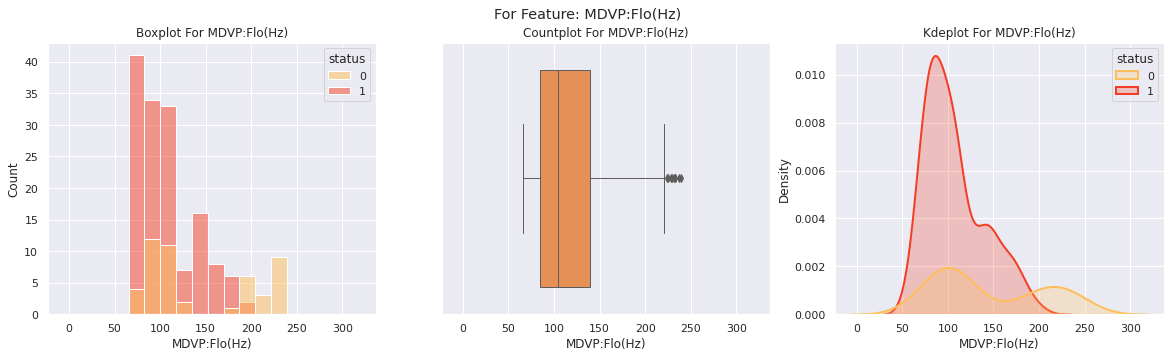

In [13]:
plot_corr(df, 'MDVP:Flo(Hz)', 'status')

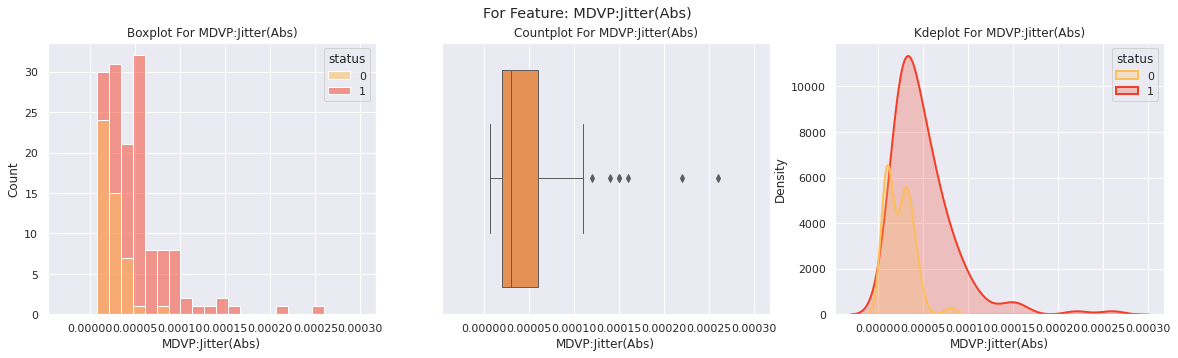

In [14]:
plot_corr(df, 'MDVP:Jitter(Abs)', 'status')

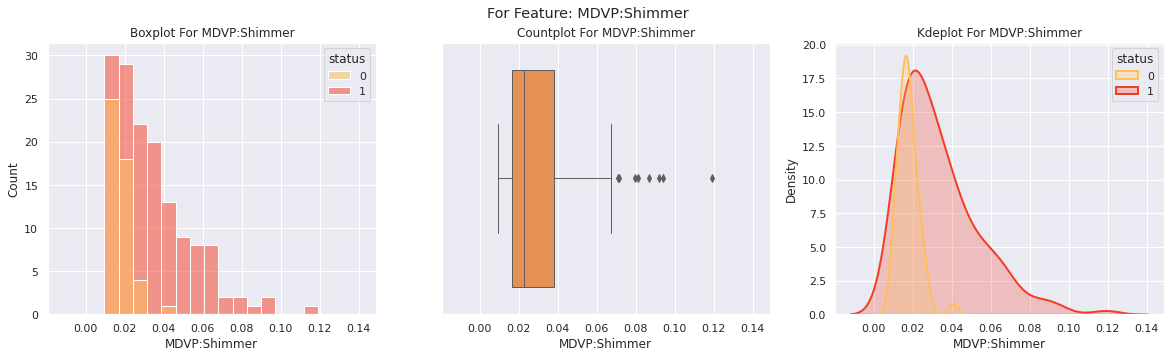

In [15]:
plot_corr(df, 'MDVP:Shimmer', 'status')

<AxesSubplot:>

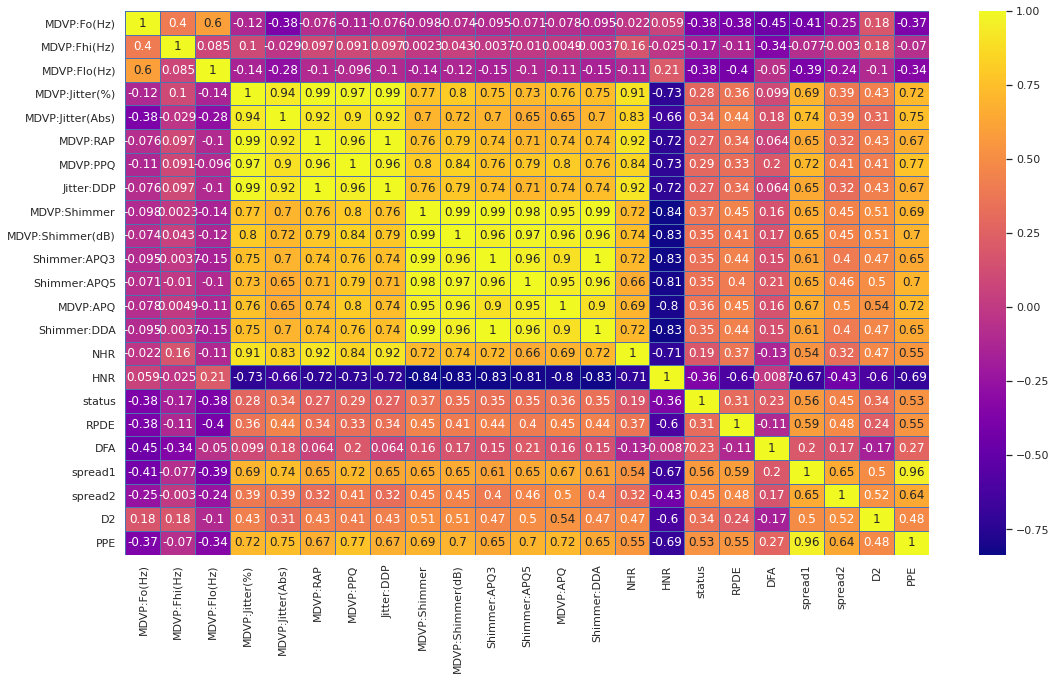

In [16]:
# Heatmap
plt.figure(figsize=(18, 10))
correlation = df.corr()

sns.heatmap(
    data=correlation,
    annot=True,
    linewidths=.5,
    linecolor='b',
    cmap='plasma'
)

## Outliers

In [17]:
new_df = df.drop(columns=['name', 'status'], axis=1)

In [18]:
# Detecting Outliers
def find_outliers_IQR(df):

    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 - IQR)
    outliers = df[(df < lower_limit) | (df > upper_limit)]
    
    #return outliers
    
    tot_out = []
    for data in outliers.columns:
        if outliers[data].dtype.name == 'int64' or outliers[data].dtype.name == 'float64':
            tot_out.append(data)
    
    return len(tot_out)
    

In [19]:
find_outliers_IQR(new_df)

22

 Since we detected only 22 outliers, we will not remove them.

## XGBoost - Training the model

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [21]:
# features and target variable
X = df.drop(columns=['status', 'name'], axis=1)
y = df[['status']]

In [22]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [24]:
# Scaling features
scaling = StandardScaler()
train_norm = scaling.fit_transform(X_train)
test_norm = scaling.fit_transform(X_test)

#### It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.

In [25]:
# XGBoost model
xgb_model = xgb.XGBClassifier(
        booster='dart',
        max_depth=10,
        )
xgb_model.fit(train_norm, y_train)

/home/maxcohen/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/maxcohen/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[16:01:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
prediction = xgb_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, prediction) * 100}")

Accuracy: 82.05128205128204
